In [ ]:
# SALUD MURCIA

In [1]:
# Lectura del conjunto de datos obtenido de la pagina de salud de Murcia 
# https://www.murciasalud.es/pagina.php?id=458869
# Recogidos desde el 08/03/2020 hasta el dia 25/03/2020
from pandas import read_csv
lectura = read_csv('casos_diarios_total_regional.csv', skiprows = 4, encoding='latin-1', sep = ';', index_col = 0, na_values = ['NaN', 'NaT'])
#lectura = read_csv('casos_diarios_total_regional.csv', skiprows = 4, encoding='latin-1', sep = ';', index_col = 0, parse_dates = ['Fecha'], na_values = ['NaN', 'NaT'])

# Headers = columnas de mi conjunto de datos. Si no especificamos asume que son las de la primera fila leida
# Skiprows = n: con n = numero de filas que quiero saltar. Las cuatro primeras son texto -> las saltamos
# Encoding = 'latin-1': para que no de errores de codificacion de algunos caracteres 
# Sep = ';': delimitador que separa las columnas
# Index_col = 0: usar la primera columna (fechas) como filas del dataframe

In [2]:
# Renombramos los nombres de algunas de las columnas para que queden mas compactos
datos = lectura.rename(columns={'Pruebas_PCR_Ag':'Pruebas_PCR_Ag',
                                'Casos_incidentes_PCR/Ag+':'Incidentes_PCR_Ag',
                                'Hospitalizados': 'H',
                                'Hospitaliz_UCI':'H_UCI',
                                'Asintomatico_hombre_<45años': 'Asint_H_<45',
                                'Asintomatico_hombre_45a64años': 'Asint_H_45a64',
                                'Asintomatico_hombre_+65años': 'Asint_H_+65',
                                'Sintomatico_hombre_<45años': 'Sint_H_<45',
                                'Sintomatico_hombre_45a64años': 'Sint_H_45a64',
                                'Sintomatico_hombre_+65años': 'Sint_H_+65',
                                'Asintomatico_mujer_<45años': 'Asint_M_<45',
                                'Asintomatico_mujer_45a64años': 'Asint_M_45a64',
                                'Asintomatico_mujer_+65años': 'Asint_M_+65',
                                'Sintomatico_mujer_<45años': 'Sint_M_<45',
                                'Sintomatico_mujer_45a64años': 'Sint_M_45a64',
                                'Sintomatico_mujer_+65años': 'Sint_M_+65'})

In [3]:
import pandas as pd
df = pd.DataFrame(datos)

In [4]:
df.head(5)

,Pruebas_PCR_Ag,Incidentes_PCR_Ag,H,H_UCI,Defunciones,Asint_H_<45,Asint_H_45a64,Asint_H_+65,Sint_H_<45,Sint_H_45a64,Sint_H_+65,Asint_M_<45,Asint_M_45a64,Asint_M_+65,Sint_M_<45,Sint_M_45a64,Sint_M_+65
Fecha,,,,,,,,,,,,,,,,,
08/03/2020,130.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
09/03/2020,21.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
10/03/2020,39.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0
11/03/2020,116.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,4.0,1.0,1.0
12/03/2020,136.0,9.0,4.0,1.0,0.0,3.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [5]:
# Nos quedamos solo con la serie de casos incidentes (casos totales) por pruebas PCR o antigenos
# (En principio considero que estos son los datos mas relevantes para mi estudio)
df_positivos = df['Incidentes_PCR_Ag']
print(df_positivos.head(5))

Fecha
08/03/2020     1.0
09/03/2020     3.0
10/03/2020     6.0
11/03/2020    12.0
12/03/2020     9.0
Name: Incidentes_PCR_Ag, dtype: float64


In [6]:
df_positivos.size

495

In [7]:
# Fijandonos en las columnas del archivo .csv vemos que hay un total de 382 filas de datos (dias)
# Como el tamaño de df_positivos es 495 > 382, podemos sospechar que existen datos de mas
# Mostramos las 113 ultimas filas para ver que en efecto existen valores NaN no definidos
df_positivos.tail(113)

Fecha
25/03/2021    88.0
NaN            NaN
NaN            NaN
NaN            NaN
NaN            NaN
              ... 
NaN            NaN
NaN            NaN
NaN            NaN
NaN            NaN
NaN            NaN
Name: Incidentes_PCR_Ag, Length: 113, dtype: float64

In [8]:
# Como podemos observar, hay muchas columnas que tienen datos desconocidos (identificados con NaN)
# https://stackabuse.com/python-how-to-handle-missing-dataframe-values-in-pandas/
# En este enlace vemos como podemos eliminar las filas cuyos valores son NaN -> mediante la funcion dropna
# De esta forma los datos ya se visualizaran solo en las fechas correctas, es decir, las puestas en el .csv
df_positivos.dropna(axis = 0, inplace = True)

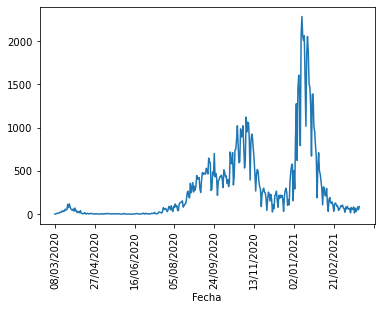

In [9]:
# Visualización de los datos con un plot simple
from matplotlib import pyplot
df_positivos.plot()
# Rotamos 45º las fechas para que se vean correctamente
pyplot.xticks(rotation=90)
pyplot.show()

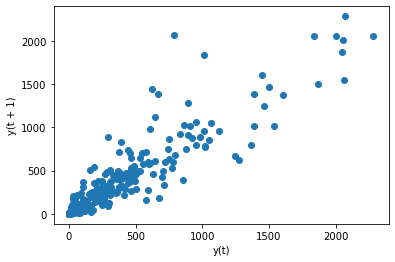

In [10]:
# Con el siguiente gráfico podemos hacer una primera aproximación sobre la presencia del virus
# en la Región de Murcia. A simple vista, la pandemia parece haber sido bien controlada, puesto que
# la nube de puntos más densa de encuentra entre los 0 y 500 casos
from pandas.plotting import lag_plot
lag_plot(df_positivos)
pyplot.show()

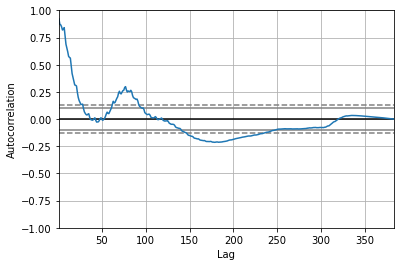

In [12]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_positivos)
pyplot.show()

In [13]:
df.dropna(axis = 0, inplace = True)

In [14]:
df.corr()

,Pruebas_PCR_Ag,Incidentes_PCR_Ag,H,H_UCI,Defunciones,Asint_H_<45,Asint_H_45a64,Asint_H_+65,Sint_H_<45,Sint_H_45a64,Sint_H_+65,Asint_M_<45,Asint_M_45a64,Asint_M_+65,Sint_M_<45,Sint_M_45a64,Sint_M_+65
Pruebas_PCR_Ag,1.000000,0.924814,0.811592,0.734834,0.718329,0.933566,0.911111,0.867579,0.903061,0.892985,0.894980,0.921794,0.892010,0.824545,0.901545,0.896624,0.885204
Incidentes_PCR_Ag,0.924814,1.000000,0.696973,0.586305,0.601761,0.965496,0.964222,0.925786,0.990621,0.983499,0.968002,0.948945,0.935251,0.893010,0.992726,0.985723,0.959587
H,0.811592,0.696973,1.000000,0.944594,0.909462,0.739986,0.723352,0.698537,0.649055,0.654464,0.707222,0.742615,0.709185,0.685277,0.654741,0.664828,0.697528
H_UCI,0.734834,0.586305,0.944594,1.000000,0.845461,0.632167,0.617913,0.583016,0.548878,0.547027,0.588978,0.629459,0.597467,0.576001,0.549198,0.552182,0.577620
Defunciones,0.718329,0.601761,0.909462,0.845461,1.000000,0.633725,0.616070,0.632963,0.558880,0.576505,0.636659,0.622331,0.594146,0.613898,0.558010,0.594175,0.636567
Asint_H_<45,0.933566,0.965496,0.739986,0.632167,0.633725,1.000000,0.958641,0.893128,0.942459,0.924098,0.917391,0.969578,0.935279,0.851640,0.946899,0.926556,0.907964
Asint_H_45a64,0.911111,0.964222,0.723352,0.617913,0.616070,0.958641,1.000000,0.906274,0.945410,0.934062,0.937380,0.944370,0.926839,0.878923,0.945799,0.933921,0.930376
Asint_H_+65,0.867579,0.925786,0.698537,0.583016,0.632963,0.893128,0.906274,1.000000,0.912942,0.910753,0.913497,0.867692,0.858492,0.906688,0.909584,0.914918,0.928057
Sint_H_<45,0.903061,0.990621,0.649055,0.548878,0.558880,0.942459,0.945410,0.912942,1.000000,0.986354,0.958582,0.916031,0.906972,0.873665,0.990678,0.984552,0.948689
Sint_H_45a64,0.892985,0.983499,0.654464,0.547027,0.576505,0.924098,0.934062,0.910753,0.986354,1.000000,0.963612,0.898964,0.895694,0.870560,0.982993,0.989007,0.952831


In [15]:
df2 = df[['Pruebas_PCR_Ag', 'Incidentes_PCR_Ag','H', 'H_UCI', 'Defunciones']]

In [16]:
df2.head(5)

,Pruebas_PCR_Ag,Incidentes_PCR_Ag,H,H_UCI,Defunciones
Fecha,,,,,
08/03/2020,130.0,1.0,0.0,0.0,0.0
09/03/2020,21.0,3.0,0.0,0.0,0.0
10/03/2020,39.0,6.0,0.0,0.0,0.0
11/03/2020,116.0,12.0,0.0,0.0,0.0
12/03/2020,136.0,9.0,4.0,1.0,0.0


In [17]:
# Creamos la matriz de correlaciones para el dataframe que acabamos de obtener
# Esto nos permite ver si los datos están correlacionados entre si
matriz_corr = df2.corr()

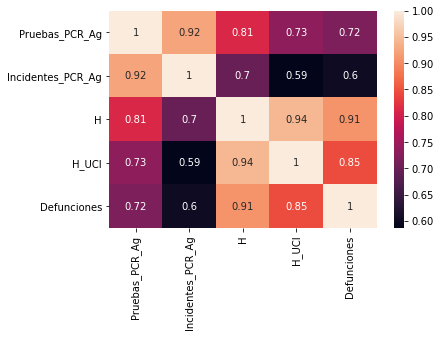

In [18]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(matriz_corr, annot=True)
plt.show()
# La siguiente tabla muestra la correlacion entre los datos de forma grafica
# Para cada una de las series se muestra la correlacion entre sus valores
# Podriamos comentar, por ejemplo, la alta correlacion (0.85) entre el numero de
# enfermos en UCI y las defunciones
# Todos los datos están positivamente correlados, y esto en principio tiene
# bastante sentido. En general, a más pruebas, más casos, más posibles hospitalizaciones
# y por tanto más posibles enfermos en UCI y defunciones